In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score


In [3]:
logins = pd.read_json("./ultimate_challenge/logins.json")

logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [16]:
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [13]:
logins.login_time.min()


Timestamp('1970-01-01 20:12:16')

In [14]:
logins.login_time.max()

Timestamp('1970-04-13 18:57:38')

In [15]:
logins['count'] = 1

In [18]:
counts = logins.groupby(pd.Grouper(key='login_time', freq='15min')).sum()

<AxesSubplot:xlabel='login_time'>

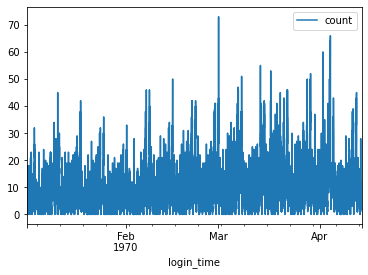

In [20]:
counts.plot()

In [36]:
counts.head()

,count,dow,tod
login_time,,,
1970-01-01 20:00:00,2,Thu,20:00
1970-01-01 20:15:00,6,Thu,20:15
1970-01-01 20:30:00,9,Thu,20:30
1970-01-01 20:45:00,7,Thu,20:45
1970-01-01 21:00:00,1,Thu,21:00


In [32]:
counts['dow'] = counts.index.strftime('%a')

In [35]:
counts['tod'] = counts.index.strftime('%H:%M')

In [37]:
counts.head()

,count,dow,tod
login_time,,,
1970-01-01 20:00:00,2,Thu,20:00
1970-01-01 20:15:00,6,Thu,20:15
1970-01-01 20:30:00,9,Thu,20:30
1970-01-01 20:45:00,7,Thu,20:45
1970-01-01 21:00:00,1,Thu,21:00


In [40]:
grouped = counts.groupby(['dow','tod'])['count'].mean()

In [45]:
grouped.head()


dow  tod  
Fri  00:00    15.800000
     00:15    17.533333
     00:30    15.466667
     00:45    16.200000
     01:00    17.266667
Name: count, dtype: float64

/Users/michaelruston/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='dow,tod'>

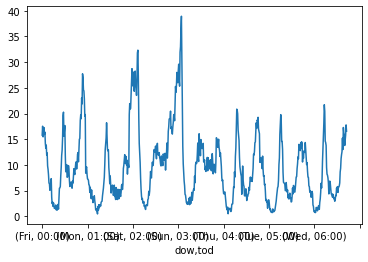

In [42]:
grouped.plot()

In [46]:
#grouped.sort_values('tod')
grouped.tail()

dow  tod  
Wed  22:45    13.785714
     23:00    14.714286
     23:15    15.785714
     23:30    17.785714
     23:45    16.571429
Name: count, dtype: float64

In [48]:
grouped = grouped.reset_index()

In [49]:
grouped.head()

,dow,tod,count
0,Fri,00:00,15.800000
1,Fri,00:15,17.533333
2,Fri,00:30,15.466667
3,Fri,00:45,16.200000
4,Fri,01:00,17.266667


In [52]:
grouped.dow.unique()

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

In [66]:
def dow_sorter(column):
    days_of_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    cat = pd.Categorical(column, categories=days_of_week, ordered=True)
    return pd.Series(cat)
    

    
SEVERITY = ["Critical", "High", "Medium", "Low"]
DAYS = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

def sorter(column):
    if column.name != "dow":
        return column
    mapper = {name: order for order, name in enumerate(DAYS)}
    return column.map(mapper)    

In [69]:
#grouped.sort_values(by=['dow','tod'], key=[dow_sorter, None] )

#grouped.sort_values('tod').sort_values(by='dow', key=dow_sorter)


sorted_data = grouped.sort_values(by=['dow','tod'], key=sorter )


In [71]:
sorted_data.head()

,dow,tod,count
96,Mon,00:00,8.400000
97,Mon,00:15,9.333333
98,Mon,00:30,9.600000
99,Mon,00:45,8.066667
100,Mon,01:00,7.266667


In [72]:
sorted_data.tail()

,dow,tod,count
379,Sun,22:45,10.133333
380,Sun,23:00,9.200000
381,Sun,23:15,8.866667
382,Sun,23:30,8.466667
383,Sun,23:45,10.600000


<AxesSubplot:>

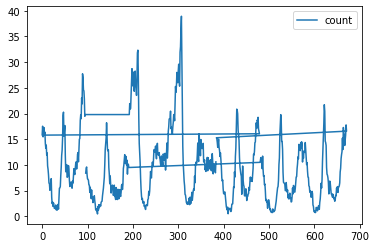

In [73]:
sorted_data.plot()

<AxesSubplot:>

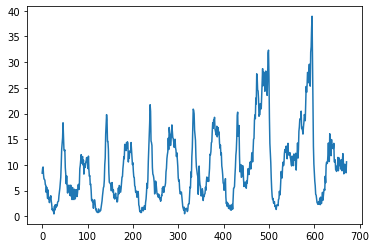

In [77]:
sorted_data = sorted_data.reset_index()

sorted_data['count'].plot()

In [78]:
sorted_data.head()

,index,dow,tod,count
0,96,Mon,00:00,8.400000
1,97,Mon,00:15,9.333333
2,98,Mon,00:30,9.600000
3,99,Mon,00:45,8.066667
4,100,Mon,01:00,7.266667


Text(0.5, 1.0, 'Monday traffic pattern')

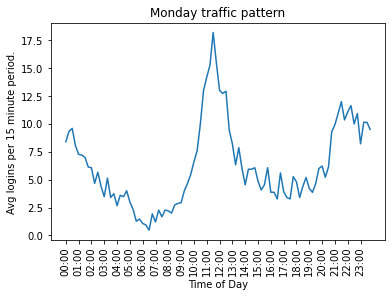

In [95]:
Monday = sorted_data[sorted_data.dow=='Mon']
idx = list(range(0,96,4))

Monday['count'].plot()
plt.xticks( idx, Monday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg logins per 15 minute period.')
plt.title('Monday traffic pattern')


Text(0.5, 1.0, 'Tuesday traffic pattern')

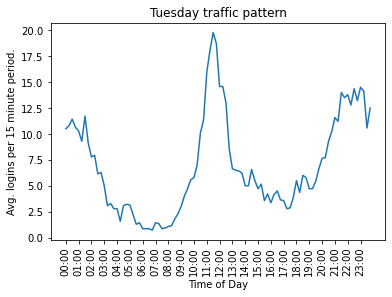

In [98]:
Tuesday = sorted_data[sorted_data.dow=='Tue'].reset_index()

Tuesday['count'].plot()
plt.xticks( idx, Tuesday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg. logins per 15 minute period.')
plt.title("Tuesday traffic pattern")


Text(0.5, 1.0, 'Wednesday traffic pattern')

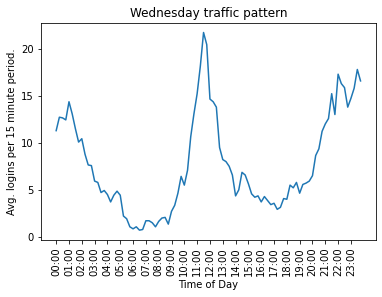

In [99]:
Wednesday = sorted_data[sorted_data.dow=='Wed'].reset_index()

Wednesday['count'].plot()
plt.xticks( idx, Wednesday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg. logins per 15 minute period.')
plt.title("Wednesday traffic pattern")

Text(0.5, 1.0, 'Thursday traffic pattern')

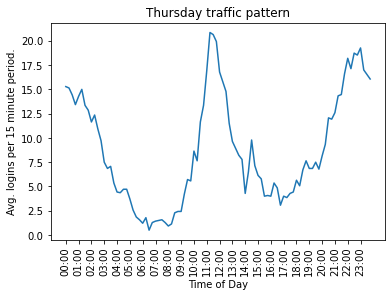

In [101]:
Thursday = sorted_data[sorted_data.dow=='Thu'].reset_index()

Thursday['count'].plot()
plt.xticks(idx, Thursday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg. logins per 15 minute period.')
plt.title('Thursday traffic pattern')



In [102]:
Friday = sorted_data[sorted_data.dow=='Fri'].reset_index()
Saturday = sorted_data[sorted_data.dow=='Sat'].reset_index()
Sunday = sorted_data[sorted_data.dow=='Sun'].reset_index()


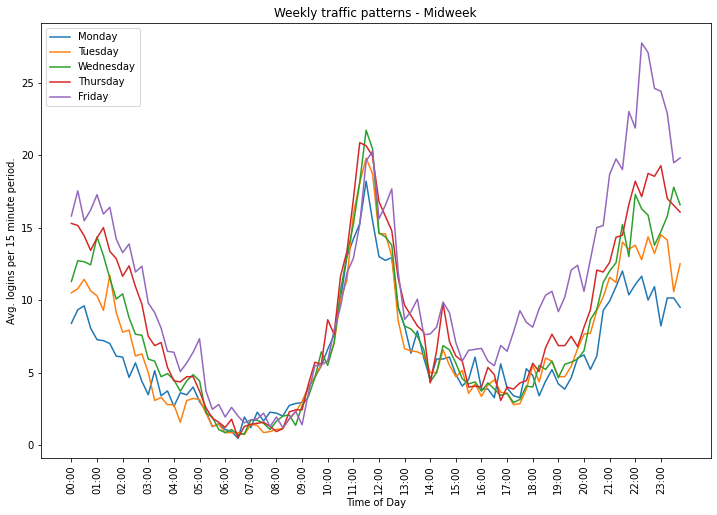

In [122]:
plt.figure( figsize=(12,8) )

Monday.rename(columns={'count':'Monday'})['Monday'].plot()
Tuesday.rename(columns={'count':'Tuesday'})['Tuesday'].plot()
Wednesday.rename(columns={'count':'Wednesday'})['Wednesday'].plot()
Thursday.rename(columns={'count':'Thursday'})['Thursday'].plot()
Friday.rename(columns={'count':'Friday'})['Friday'].plot()

#Saturday.rename(columns={'count':'Saturday'})['Saturday'].plot()
#Sunday.rename(columns={'count':'Sunday'})['Sunday'].plot()

plt.xticks( idx, Wednesday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg. logins per 15 minute period.')
plt.title("Weekly traffic patterns - Midweek")

plt.legend()

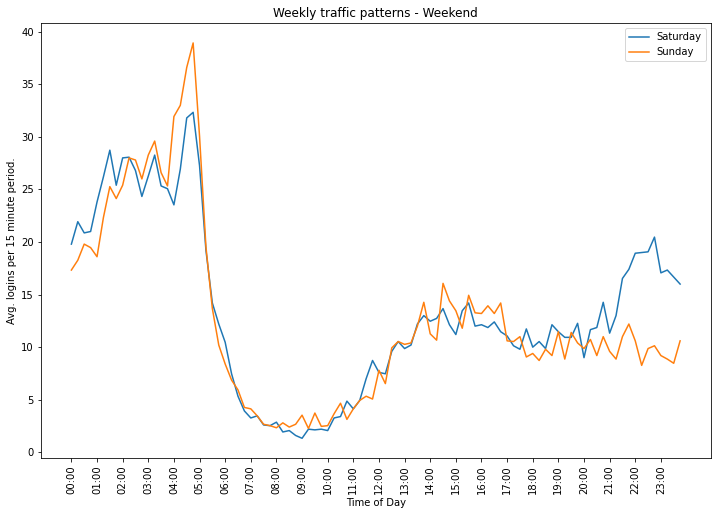

In [123]:
plt.figure( figsize=(12,8) )

Saturday.rename(columns={'count':'Saturday'})['Saturday'].plot()
Sunday.rename(columns={'count':'Sunday'})['Sunday'].plot()

plt.xticks( idx, Wednesday.tod[idx], rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Avg. logins per 15 minute period.')
plt.title("Weekly traffic patterns - Weekend")

plt.legend()

Part 1:

The 5 weekdays show a similar pattern of login behavior.
Logins decrease from midnight until about 8:00am, then rise again.
Login volume peaks around 11:30am, then decreases again until 5pm.
Logins increase again after 5pm. Fridays have more login volume from 5pm until midnight than the other 4 weekdays.
Mondays have less login volume from 10pm to midnight than the other 4 weekdays.

Saturdays and Sundays have similar login patterns.
Logins increase from midnight until approximately 4:30am, then drop quickly.
Weekend logins are lowest at 9:00am, then increase slightly until 3:00pm before decreasing again slightly.
Saturday also has higher login volume from 9:00pm until midnight than Sunday.

No major data quality issues were detected.

Part 2:
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: I would look at the number of trips that start in one city and end in the other. For these trips, the toll would have been paid. If we see an increase in trips between the two cities, then the toll reimbursement is likely working to encourage drivers to serve both cities.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the observation
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer:
a) I would try reimbursing the toll for half the drivers and not reimburse the toll for the other half of drivers.

b) Then look to see if the reimbursed drivers have a higher proportion of trips between cities than the non-reimbursed drivers. We would perform a Two Proportion Z-test.

c) If the reimbursed drivers showed a significantly higher proportion of trips between the two cities than the non-reimbursed drivers, we would conclude that the reimbursement policy has the effect of increasing trips between the cities. One caveat is that the reimbursement policy would cost money, so the city operations team would need to weigh this cost against the potential benefits.



In [124]:
data = pd.read_json("./ultimate_challenge/ultimate_data_challenge.json")

In [125]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [126]:
data.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [127]:
data.trips_in_first_30_days.value_counts()

0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
33         9
37         9
32         8
31         6
44         5
40         5
38         4
43         4
47         3
42         3
36         3
39         3
53         2
55         2
56         2
54         2
48         2
49         2
35         2
125        1
73         1
58         1
71         1
41         1
50         1
51         1
63         1
Name: trips_in_first_30_days, dtype: int64

In [128]:
data.signup_date.value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

<AxesSubplot:>

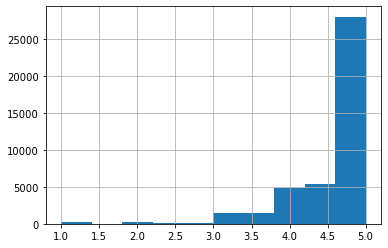

In [129]:
data.avg_rating_of_driver.hist()

<AxesSubplot:>

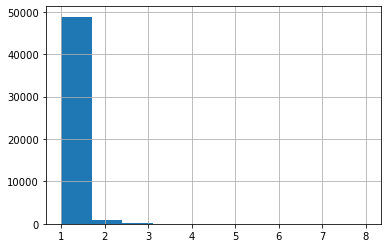

In [130]:
data.avg_surge.hist()

In [131]:
data[data.avg_surge>3]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
81,Winterfell,1,2014-01-25,4.0,3.50,2014-02-05,Android,100.0,True,100.0,17.89,4.0
274,Astapor,1,2014-01-25,2.0,4.00,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
1405,Winterfell,1,2014-01-08,5.0,4.75,2014-01-21,iPhone,100.0,False,100.0,6.46,5.0
1810,Winterfell,0,2014-01-11,NaN,3.25,2014-06-11,iPhone,100.0,False,100.0,4.51,5.0
2817,Winterfell,0,2014-01-02,5.0,5.00,2014-02-05,iPhone,100.0,False,100.0,3.18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48709,Winterfell,2,2014-01-14,5.0,3.25,2014-06-20,iPhone,100.0,True,100.0,0.85,5.0
48971,Winterfell,2,2014-01-09,5.0,3.25,2014-01-21,iPhone,100.0,False,50.0,3.78,5.0
49104,Astapor,0,2014-01-17,5.0,4.00,2014-04-06,iPhone,100.0,False,0.0,1.56,5.0
49383,Winterfell,1,2014-01-10,NaN,5.00,2014-01-11,iPhone,100.0,False,100.0,2.40,5.0


In [133]:
data.last_trip_date.min()

'2014-01-01'

In [134]:
data.last_trip_date.max()

'2014-07-01'

In [135]:
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

<AxesSubplot:>

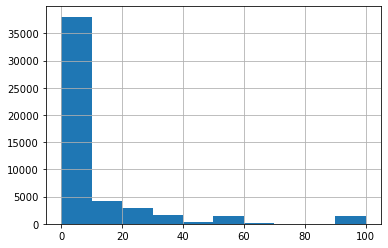

In [136]:
data.surge_pct.hist()

In [137]:
data.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

<AxesSubplot:>

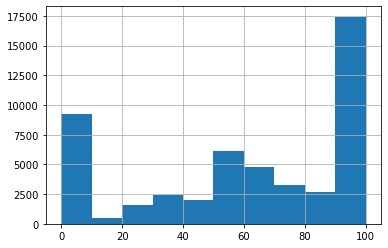

In [138]:
data.weekday_pct.hist()

<AxesSubplot:>

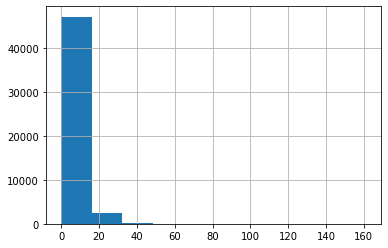

In [139]:
data.avg_dist.hist()

In [140]:
data[data.avg_dist>40]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
534,King's Landing,0,2014-01-04,NaN,1.0,2014-03-09,None,0.0,False,0.0,129.89,5.0
799,Astapor,0,2014-01-28,5.0,1.0,2014-05-15,Android,0.0,False,100.0,60.58,5.0
891,King's Landing,0,2014-01-19,5.0,1.0,2014-03-07,iPhone,0.0,False,100.0,43.71,5.0
1302,Winterfell,1,2014-01-30,5.0,1.0,2014-01-30,iPhone,0.0,False,100.0,79.69,5.0
1482,King's Landing,1,2014-01-08,NaN,1.0,2014-01-10,Android,0.0,False,100.0,52.15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48134,Winterfell,1,2014-01-24,NaN,1.0,2014-01-26,iPhone,0.0,False,0.0,42.66,5.0
48887,Winterfell,0,2014-01-17,5.0,1.0,2014-04-13,iPhone,0.0,False,0.0,53.99,5.0
48934,Astapor,0,2014-01-10,NaN,1.0,2014-05-14,iPhone,0.0,True,100.0,42.46,5.0
49170,Astapor,1,2014-01-01,5.0,1.0,2014-01-23,iPhone,0.0,False,100.0,41.83,5.0


<AxesSubplot:>

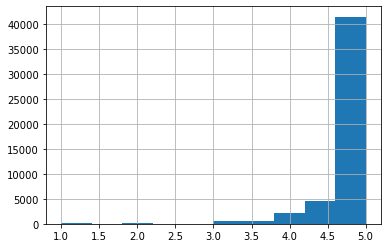

In [141]:
data.avg_rating_by_driver.hist()

In [142]:
data[data.last_trip_date > '2014-06-01']

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7


In [143]:
data.shape

(50000, 12)

In [145]:
sum( data.last_trip_date > '2014-06-01' ) / data.shape[0]

0.3662

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Answer: 36.62% of users were active- meaning they took a trip in the last 30 days.


In [151]:
data['active'] = (data.last_trip_date > '2014-06-01').astype(int)

In [154]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [153]:
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int) 

In [155]:
pd.get_dummies(data.phone)

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
49995,0,1
49996,0,1
49997,1,0
49998,0,1


In [159]:
data = pd.concat([ data , pd.get_dummies(data.phone)] , axis=1 )

In [160]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Android,iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,1,0


In [162]:
data = pd.concat( [data, pd.get_dummies(data.city)] , axis=1 )

In [163]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Android,iPhone,Astapor,King's Landing,Winterfell
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,0,1,0,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,1,0,1,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,0,1,1,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,0,1,0,1,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,1,0,0,0,1


In [167]:
df = data.drop(columns=['city','signup_date','last_trip_date','phone','active'])

In [168]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Android,iPhone,Astapor,King's Landing,Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,1,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,0,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,1,0,0,0,1


In [192]:
y = data['active']
X = df

sum(y.isna())

sum( X.trips_in_first_30_days.isna() )

sum( X.avg_rating_of_driver.isna() )
X.avg_rating_of_driver.median()

X['avg_rating_of_driver'] = X['avg_rating_of_driver'].fillna(X.avg_rating_of_driver.median())

sum( X.avg_rating_of_driver.isna() )


0

In [200]:
sum( X.avg_surge.isna() )

sum( X.surge_pct.isna() )

sum( X.ultimate_black_user.isna() )

sum( X.weekday_pct.isna() )

sum( X.avg_dist.isna() )

sum( X.avg_rating_by_driver.isna() )

X['avg_rating_by_driver'] = X['avg_rating_by_driver'].fillna(X.avg_rating_by_driver.median())

sum( X.avg_rating_by_driver.isna() )

0

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [202]:
### Train-Test split
X_train.shape
X_test.shape
y_train.shape
y_test.shape
### Fit a model
###



(10000,)

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf = RandomForestClassifier()

In [203]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [204]:
rf.score(X_train, y_train)

0.99685

In [206]:
y_train.mean()

0.3658

In [207]:
pred = rf.predict( X_test )

In [214]:
rf_cv_scores = cross_val_score(RandomForestClassifier(), X_test, y_test, scoring='accuracy', cv=5)
rf_cv_mean = np.mean(rf_cv_scores)


In [215]:
rf_cv_mean

0.7586